In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import f_regression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import statsmodels.api as sm

import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

/Users/archydeberker/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Exploring the data


In [2]:
df = pd.read_excel('../data/destinations.xls', header=2, index='MRS')

In [3]:
df = df.set_index('MRS')

In [4]:
df = df.drop( 'Unnamed: 5', axis=1,)

In [5]:
df

,Home/n,CH/n,inpatient/n,Death/n
MRS,,,,
1,0.647887,0.183206,0.063707,0.333333
2,0.295775,0.312977,0.177606,0.301075
3,0.056338,0.316794,0.318533,0.258065
4,0.000000,0.171756,0.416988,0.096774
5,0.000000,0.015267,0.023166,0.010753
6,0.000000,0.000000,0.000000,0.000000


In [6]:
mtx = df.as_matrix()

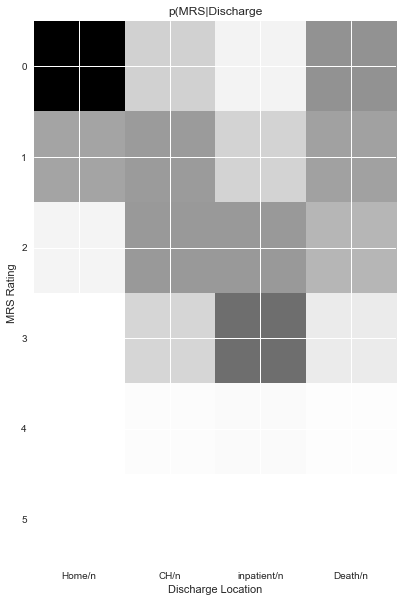

In [7]:
plt.figure(figsize=(10,10))
plt.title('p(MRS|Discharge')
plt.imshow(mtx)
plt.xlabel('Discharge Location')
plt.xticks(range(4), df.columns.values)
plt.ylabel('MRS Rating')
plt.show()

In [16]:
df2 = pd.read_excel('../data/destinations_inverted.xlsx', header=3)

In [17]:
df2

,Rows sum to 1,MRS,Death/n,Home/n,inpatient/n,CH/n
NaN,1.0,1,0.196203,0.291139,0.208861,0.303797
NaN,1.0,2,0.125561,0.094170,0.412556,0.367713
NaN,1.0,3,0.086957,0.014493,0.597826,0.300725
NaN,1.0,4,0.033333,0.000000,0.800000,0.166667
NaN,1.0,5,0.058824,0.000000,0.705882,0.235294
NaN,NaN,6,0.000000,0.000000,0.000000,0.000000


In [18]:
df2 = df2.set_index('MRS')

In [19]:
df2.drop('Rows sum to 1', axis=1, inplace=True)

In [20]:
df2

,Death/n,Home/n,inpatient/n,CH/n
MRS,,,,
1,0.196203,0.291139,0.208861,0.303797
2,0.125561,0.094170,0.412556,0.367713
3,0.086957,0.014493,0.597826,0.300725
4,0.033333,0.000000,0.800000,0.166667
5,0.058824,0.000000,0.705882,0.235294
6,0.000000,0.000000,0.000000,0.000000


/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


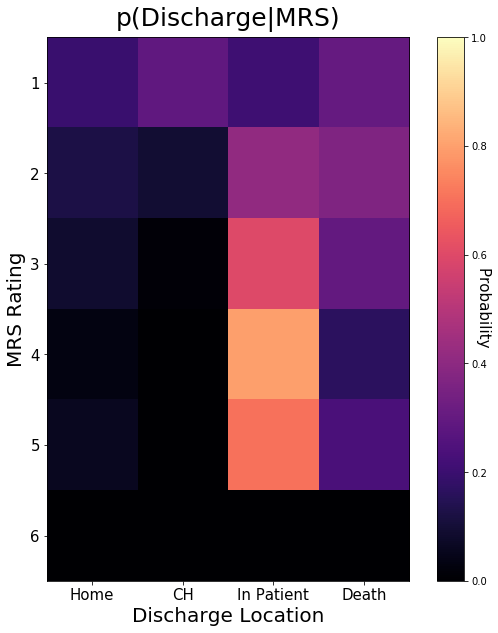

In [21]:
plt.figure(figsize=(10, 10))
mtx2 = df2.as_matrix()
plt.title('p(Discharge|MRS)', fontsize=25, position=(0.5, 1.01))
plt.imshow(mtx2, vmin=0, vmax=1, cmap='magma')
plt.xlabel('Discharge Location', fontsize=20)
plt.yticks(range(0,6), range(1,7), fontsize=15)
plt.xticks(range(0, 4), ['Home', 'CH', 'In Patient', 'Death'], fontsize=15)
plt.ylabel('MRS Rating',  fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability ', rotation=270, fontsize=15)
plt.show()

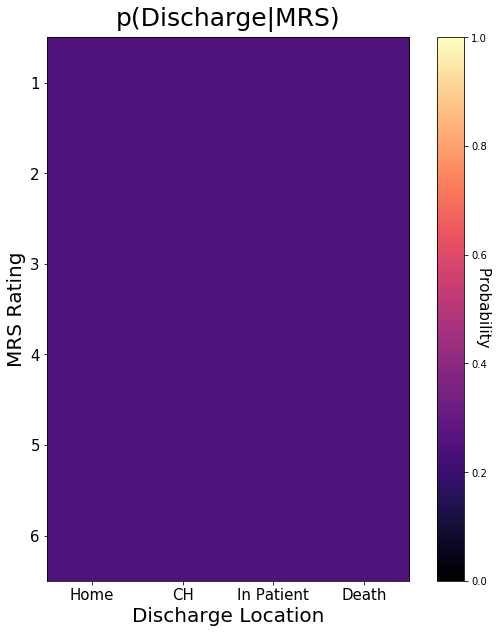

In [22]:
plt.figure(figsize=(10, 10))
dummy_mtx = .25*np.ones(shape=(6,4))
plt.title('p(Discharge|MRS)', fontsize=25, position=(0.5, 1.01))
plt.imshow(dummy_mtx, vmin=0, vmax=1, cmap='magma')

plt.xlabel('Discharge Location', fontsize=20)
plt.yticks(range(0,6), range(1,7), fontsize=15)
plt.xticks(range(0, 4), ['Home', 'CH', 'In Patient', 'Death'], fontsize=15)
plt.ylabel('MRS Rating',  fontsize=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Probability ', rotation=270, fontsize=15)
plt.show()

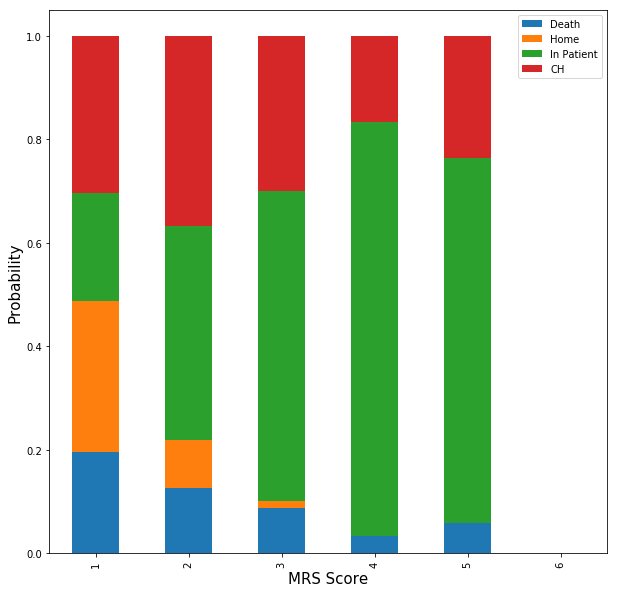

In [23]:
df2.plot.bar(stacked=True, figsize=(10,10))
plt.legend(['Death', 'Home', 'In Patient', 'CH'])
plt.ylabel('Probability', fontsize=15)
plt.xlabel('MRS Score', fontsize=15)
plt.show()

# Logistic regression

### Dummy data

In [96]:
dummy_data = pd.DataFrame([[67,5,3, 0], [89,9,2, 1], [92,10,4, 2], [98,45,3, 3]], columns=['Age', 'NIHSS', 'MRS', 'Destination'])

In [97]:
dummy_data

,Age,NIHSS,MRS,Destination
0,67,5,3,0
1,89,9,2,1
2,92,10,4,2
3,98,45,3,3


In [104]:
df_mtx = dummy_data.as_matrix()
df_mtx = stats.zscore(df_mtx)

In [111]:
X = df_mtx[:,:3]
X

array([[-1.66447944, -0.75943896,  0.        ],
       [ 0.2133948 , -0.51145889, -1.41421356],
       [ 0.46946856, -0.44946388,  1.41421356],
       [ 0.98161608,  1.72036173,  0.        ]])

In [126]:
y = df_mtx[:,-1]
y = [int(np.floor(yy)) + 2 for yy in y]

In [127]:
y

[0, 1, 2, 3]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [129]:
X_train

array([[ 0.2133948 , -0.51145889, -1.41421356],
       [ 0.46946856, -0.44946388,  1.41421356],
       [ 0.98161608,  1.72036173,  0.        ]])

In [130]:
lr = LogisticRegression()

In [131]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
lr.predict(X_test)

array([1])

In [135]:
y_test

[0]

### Real Data

In [37]:
df = pd.read_excel('../data/Discharge destinations 2.xlsx', 
                   sheet_name='Regression analysis',
                  header=2)

df.reset_index(inplace=True)
df.drop(['index', 'Key'], axis=1, inplace=True)
outcome_dict={0:'Home', 1:'CH', 2:'Inpatient', 3:'Death'}
df['Outcome']=df['Outcome'].map(lambda x: outcome_dict[x])

In [38]:
df.dtypes

Age         int64
NIHSS       int64
MRS         int64
Outcome    object
dtype: object

/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


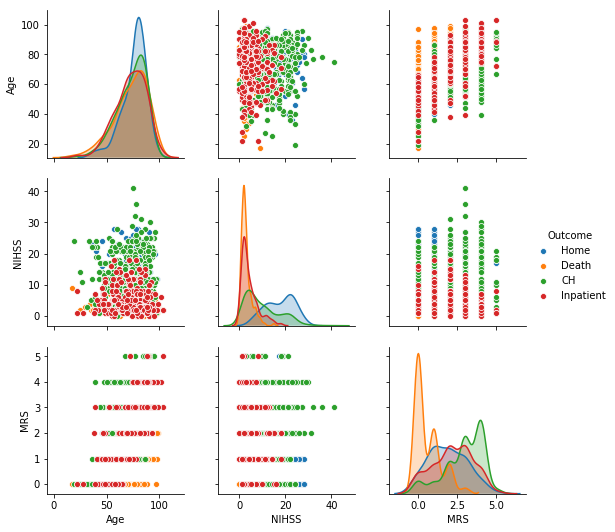

In [39]:
sns.pairplot(df, hue='Outcome')

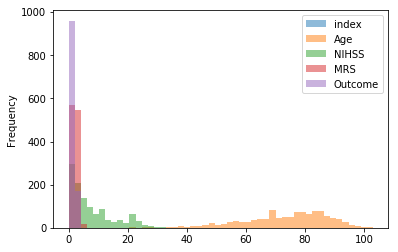

In [396]:
df.plot.hist(alpha=0.5, bins=50)

Power_divergenceResult(statistic=166.3523316062176, pvalue=7.79995723517671e-36)

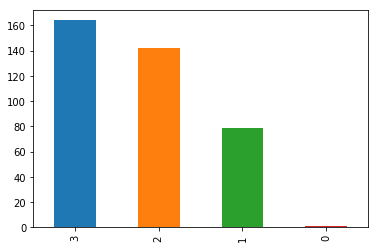

In [397]:
df[(df['MRS']<=2) & (df['NIHSS'] <=9)]['Outcome'].value_counts().plot.bar(stacked=True)
stats.chisquare(df[(df['MRS']<=2) & (df['NIHSS'] <=9)]['Outcome'].value_counts())



In [398]:
X = df[['Age', 'NIHSS', 'MRS']].as_matrix() 
X = stats.zscore(X)

y = df['Outcome'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [408]:
lr = LogisticRegression(C=0.01)

In [409]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [410]:
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 2, 3, 3, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 1, 1, 2, 2,
       1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 3, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 2, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 2, 1, 2,
       2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 3, 1, 1, 1, 1, 1, 2, 3])

In [411]:
lr.score(X_test, y_test) # This reports accuracy

0.5936395759717314

In [412]:
lr.fit_intercept=True

In [413]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [414]:
lr.score(X_test, y_test) # This reports accuracy

0.5936395759717314

## Try with an SVM

In [417]:
s_v_m = svm.SVC()

In [418]:
s_v_m.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [419]:
s_v_m.score(X_test, y_test)

0.6431095406360424

## Random Forest

In [435]:
rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators=100)

In [436]:
rf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [437]:
rf.score(X_test, y_test)

0.6113074204946997

# Baseline model

In [301]:
dc = DummyClassifier()

In [302]:
dc.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [303]:
dc.score(X_test, y_test)

0.3286219081272085

## Statsmodel

In [306]:
y_train

array([2, 1, 3, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 3, 0, 2, 1, 2, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 2, 0,
       2, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       1, 2, 3, 0, 3, 1, 2, 2, 0, 1, 3, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 1, 1, 3, 2, 2, 1,
       1, 1, 2, 1, 3, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 3, 1, 1, 1, 2, 1, 1,
       2, 2, 3, 2, 3, 2, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 1, 3, 1, 2, 0,
       3, 1, 3, 2, 0, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 0, 1, 3, 0, 0, 2, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 3, 1, 1, 0, 3, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 1, 0, 2, 3, 3, 3, 3, 2, 0, 1, 1, 3, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 0, 2, 3,
       1, 3, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 3, 2, 3, 1, 1, 2, 0,
       1, 2, 3, 1, 1, 2, 2, 0, 3, 3, 1, 1, 1, 1, 2,

In [307]:
X_train = sm.add_constant(X_train)
sm_lr = sm.MNLogit(y_train, X_train)

In [308]:
result = sm_lr.fit()

Optimization terminated successfully.
         Current function value: 0.732295
         Iterations 8


In [309]:
result.pvalues

array([[2.03339696e-27, 6.47190570e-13, 8.69284574e-05],
       [2.68237781e-07, 5.98925758e-02, 5.48521689e-04],
       [1.81172897e-07, 7.79442055e-29, 1.40473705e-17],
       [1.11227743e-10, 5.88524990e-01, 9.40371059e-14]])

In [310]:
# Workaround from https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [311]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  848
Model:                        MNLogit   Df Residuals:                      836
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.3933
Time:                        07:18:52   Log-Likelihood:                -620.99
converged:                       True   LL-Null:                       -1023.5
                                        LLR p-value:                1.822e-167
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2523      0.208     10.848      0.000       1.845       2.659
x1            -1.0549      0.205     -5.144      0.000      -1.457      -0.653
x2            -0.7112      0.136     -5.218      0.000      -0.978      -0.444
x3             1.4933      0.231      6.451      0.000       1.040       1.947
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5818      0.220      7.190      0.000       1.151       2.013
x1            -0.4273      0.227     -1.882      0.060      -0.872       0.018
x2            -2.3525      0.211    -11.142      0.000      -2.766      -1.939
x3             0.1390      0.257      0.541      0.589      -0.365       0.643
------------------------------------------------------------------------------
       y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6843      0.429     -3.924      0.000      -2.526      -0.843
x1             1.0062      0.291      3.456      0.001       0.436       1.577
x2            -3.4295      0.402     -8.535      0.000      -4.217      -2.642
x3            -2.9409      0.395     -7.449      0.000      -3.715      -2.167
==============================================================================
"""

## Feature correlations

/Users/archydeberker/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/archydeberker/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


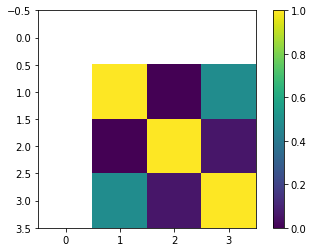

In [312]:
plt.imshow(np.corrcoef(X_train.T), vmin=0, vmax=1)
plt.colorbar()

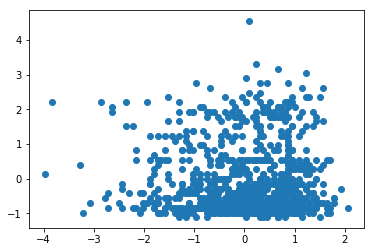

In [313]:
plt.scatter(X_train[:,1], X_train[:,2])

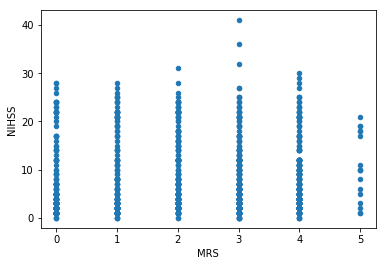

In [318]:
df.plot.scatter('MRS', 'NIHSS')

In [319]:
df.corr()

,index,Age,NIHSS,MRS,Outcome
index,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.036907,0.482974,-0.047996
NIHSS,NaN,-0.036907,1.000000,0.035380,-0.549533
MRS,NaN,0.482974,0.035380,1.000000,-0.407857
Outcome,NaN,-0.047996,-0.549533,-0.407857,1.000000


## Excluding death

In [340]:
df = df[df['Outcome'] != 0]

In [341]:
len(df)

1025

,index,Age,NIHSS,MRS,Outcome
index,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.060104,0.497140,-0.018126
NIHSS,NaN,-0.060104,1.000000,0.140482,-0.435349
MRS,NaN,0.497140,0.140482,1.000000,-0.570875
Outcome,NaN,-0.018126,-0.435349,-0.570875,1.000000


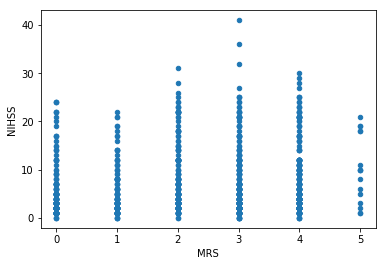

In [342]:
df.plot.scatter('MRS', 'NIHSS')
df.corr()

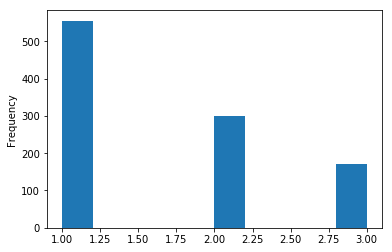

In [343]:
df['Outcome'].plot.hist()

In [344]:
X = df[['Age', 'NIHSS', 'MRS']].as_matrix() 
X = stats.zscore(X)

y = df['Outcome'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [357]:
X_train.shape

(768, 4)

In [345]:
X_train = sm.add_constant(X_train)
sm_lr = sm.MNLogit(y_train, X_train)

In [346]:
result = sm_lr.fit()

Optimization terminated successfully.
         Current function value: 0.603084
         Iterations 9


In [347]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  768
Model:                        MNLogit   Df Residuals:                      760
Method:                           MLE   Df Model:                            6
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.3928
Time:                        07:33:48   Log-Likelihood:                -463.17
converged:                       True   LL-Null:                       -762.73
                                        LLR p-value:                3.592e-126
==============================================================================
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4789      0.105     -4.580      0.000      -0.684      -0.274
x1             0.4448      0.127      3.490      0.000       0.195       0.695
x2            -1.2730      0.150     -8.513      0.000      -1.566      -0.980
x3            -1.2101      0.153     -7.908      0.000      -1.510      -0.910
------------------------------------------------------------------------------
       y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6774      0.370     -9.950      0.000      -4.402      -2.953
x1             1.9124      0.237      8.063      0.000       1.448       2.377
x2            -2.4774      0.383     -6.472      0.000      -3.228      -1.727
x3            -4.3071      0.352    -12.246      0.000      -4.996      -3.618
==============================================================================
"""

In [350]:
predictor = result.predict()

In [353]:
len(predictor)

768

In [354]:
result.pvalues

array([[4.64859541e-06, 2.51598934e-23],
       [4.83871868e-04, 7.44876328e-16],
       [1.69290928e-17, 9.68802235e-11],
       [2.61677372e-15, 1.75632169e-34]])

In [355]:
result.params

array([[-0.47886362, -3.67740155],
       [ 0.44484866,  1.91237577],
       [-1.27297284, -2.47737004],
       [-1.21005499, -4.30714878]])